# EDA: Trap & Spray Data
### Goal: Look at the [trap data]('../input/train.csv') and [spray data]('../input/spray.csv') to do the following:
1. Clean the data (fill/remove nulls)
2. Understand traps, mosquito species, presence of west nile, spray frequency and area
3. Gain insight into species to west nile
4. Discover trends
5. Visual important figures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_spray = pd.DataFrame(pd.read_csv('../data/spray.csv'))
df_train = pd.DataFrame(pd.read_csv('../data/train.csv'))

# the map we'll use to visual
mapdata = np.loadtxt('../data/mapdata_copyright_openstreetmap_contributors.txt')

In [3]:
df_train.shape

(10506, 12)

In [4]:
df_train.notnull().sum()

Date                      10506
Address                   10506
Species                   10506
Block                     10506
Street                    10506
Trap                      10506
AddressNumberAndStreet    10506
Latitude                  10506
Longitude                 10506
AddressAccuracy           10506
NumMosquitos              10506
WnvPresent                10506
dtype: int64

No nulls!

In [5]:
df_train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [6]:
df_train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [7]:
df_spray.shape

(14835, 4)

In [8]:
df_spray.notnull().sum()

Date         14835
Time         14251
Latitude     14835
Longitude    14835
dtype: int64

There are around 500 null time values. Since the `df_spray` values occur every 10 seconds, and won't match up with our `df_train` date (and they don't have a time), we can safely drop them. We could simply easily do basic addition to fill them in since they're at 10 second intervals, but there's no real benefit to having that extra data.

In [9]:
df_spray.dropna(inplace=True)

In [10]:
df_spray.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

### Datetime

`df_train` records multiple traps per day whereas `df_spray` records every 10 seconds and only provides us with the location of spray.

We'll make sure everything is in `datetime` so we can easily work with it and find trends based on the time and date. We'll also set it to the index so we can easily manipulate the dataframe and quickly highlight certain time frames.

In [11]:
df_spray['date_time'] = df_spray['Date'] +" "+ df_spray['Time']
df_spray = df_spray.drop(columns=["Date","Time"])
df_spray['date_time'] = pd.to_datetime(df_spray['date_time'])
df_spray.set_index('date_time',inplace=True)

In [12]:
df_spray.head()

Latitude  Longitude
date_time                                
2011-08-29 18:56:58  42.391623 -88.089163
2011-08-29 18:57:08  42.391348 -88.089163
2011-08-29 18:57:18  42.391022 -88.089157
2011-08-29 18:57:28  42.390637 -88.089158
2011-08-29 18:57:38  42.390410 -88.088858

In [13]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_train.set_index('Date',inplace=True)

In [14]:
df_train.head()

Address  \
Date                                                            
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                           Species  Block           Street  Trap  \
Date                                                               
2007-05-29  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2007-05-29          CULEX RESTUANS     62    N MANDELL AVE  T007   
2007-05-29  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
2007-05-29          CULEX RESTUANS     79     W FOSTER AVE  T015   

                       AddressNumberAndStreet   Latitude  Longitude  \
Date                                                                  
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
2007-05-29   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
2007-05-29    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   

            AddressAccuracy  NumMosquitos  WnvPresent  
Date                                                   
2007-05-29                9             1           0  
2007-05-29                9             1           0  
2007-05-29                9             1           0  
2007-05-29                8             1           0  
2007-05-29                8             4           0

### Duplicates

In [15]:
df_spray[df_spray.duplicated()].head()

Latitude  Longitude
date_time                                
2011-09-07 19:43:40  41.983917 -87.793088
2011-09-07 19:44:32  41.986460 -87.794225
2011-09-07 19:44:32  41.986460 -87.794225
2011-09-07 19:44:32  41.986460 -87.794225
2011-09-07 19:44:32  41.986460 -87.794225

We can get rid of these. They don't add information. It's exactly the same.

In [16]:
df_spray.drop_duplicates(inplace=True)

In [17]:
df_train[df_train.duplicated()].shape

(5837, 11)

In [18]:
df_train[df_train.duplicated()].head()

Address  \
Date                                                           
2007-06-05   7900 West Foster Avenue, Chicago, IL 60656, USA   
2007-06-05  1500 West Webster Avenue, Chicago, IL 60614, USA   
2007-06-05    2500 West Grand Avenue, Chicago, IL 60654, USA   
2007-06-05       1100 Roosevelt Road, Chicago, IL 60608, USA   
2007-06-05   2100 North Stave Street, Chicago, IL 60647, USA   

                           Species  Block          Street  Trap  \
Date                                                              
2007-06-05  CULEX PIPIENS/RESTUANS     79    W FOSTER AVE  T015   
2007-06-05          CULEX RESTUANS     15   W WEBSTER AVE  T045   
2007-06-05          CULEX RESTUANS     25     W GRAND AVE  T046   
2007-06-05  CULEX PIPIENS/RESTUANS     11     W ROOSEVELT  T048   
2007-06-05  CULEX PIPIENS/RESTUANS     21      N STAVE ST  T050   

                      AddressNumberAndStreet   Latitude  Longitude  \
Date                                                                 
2007-06-05   7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812   
2007-06-05  1500  W WEBSTER AVE, Chicago, IL  41.921600 -87.666455   
2007-06-05    2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   
2007-06-05    1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224   
2007-06-05     2100  N STAVE ST, Chicago, IL  41.919343 -87.694259   

            AddressAccuracy  NumMosquitos  WnvPresent  
Date                                                   
2007-06-05                8             1           0  
2007-06-05                8             2           0  
2007-06-05                8             1           0  
2007-06-05                8             1           0  
2007-06-05                8             1           0

We can't just drop duplicates right away. First because it's nearly $\frac{1}{3}$ of the original dataset. Second is because we know that, if `NumMosquitos` reaches 50 for the same `Trap`, a new row is added. If that exceeds 50, there will be continued additions of rows until all the mosquitoes are accounted for. So we don't want to drop. For example, if we look at `df_train[(df_train.duplicated()) & (df_train['Trap'] == 'T158')]` we want to keep that data.

Also, it will be nice to have a LatLong column so we can look at various values based on exact location.

In [19]:
df_train['LatLong'] = df_train['Latitude'] * df_train['Longitude']

## Basic Visuals
### Location
Which traps/areas have the highest rate of west nile:

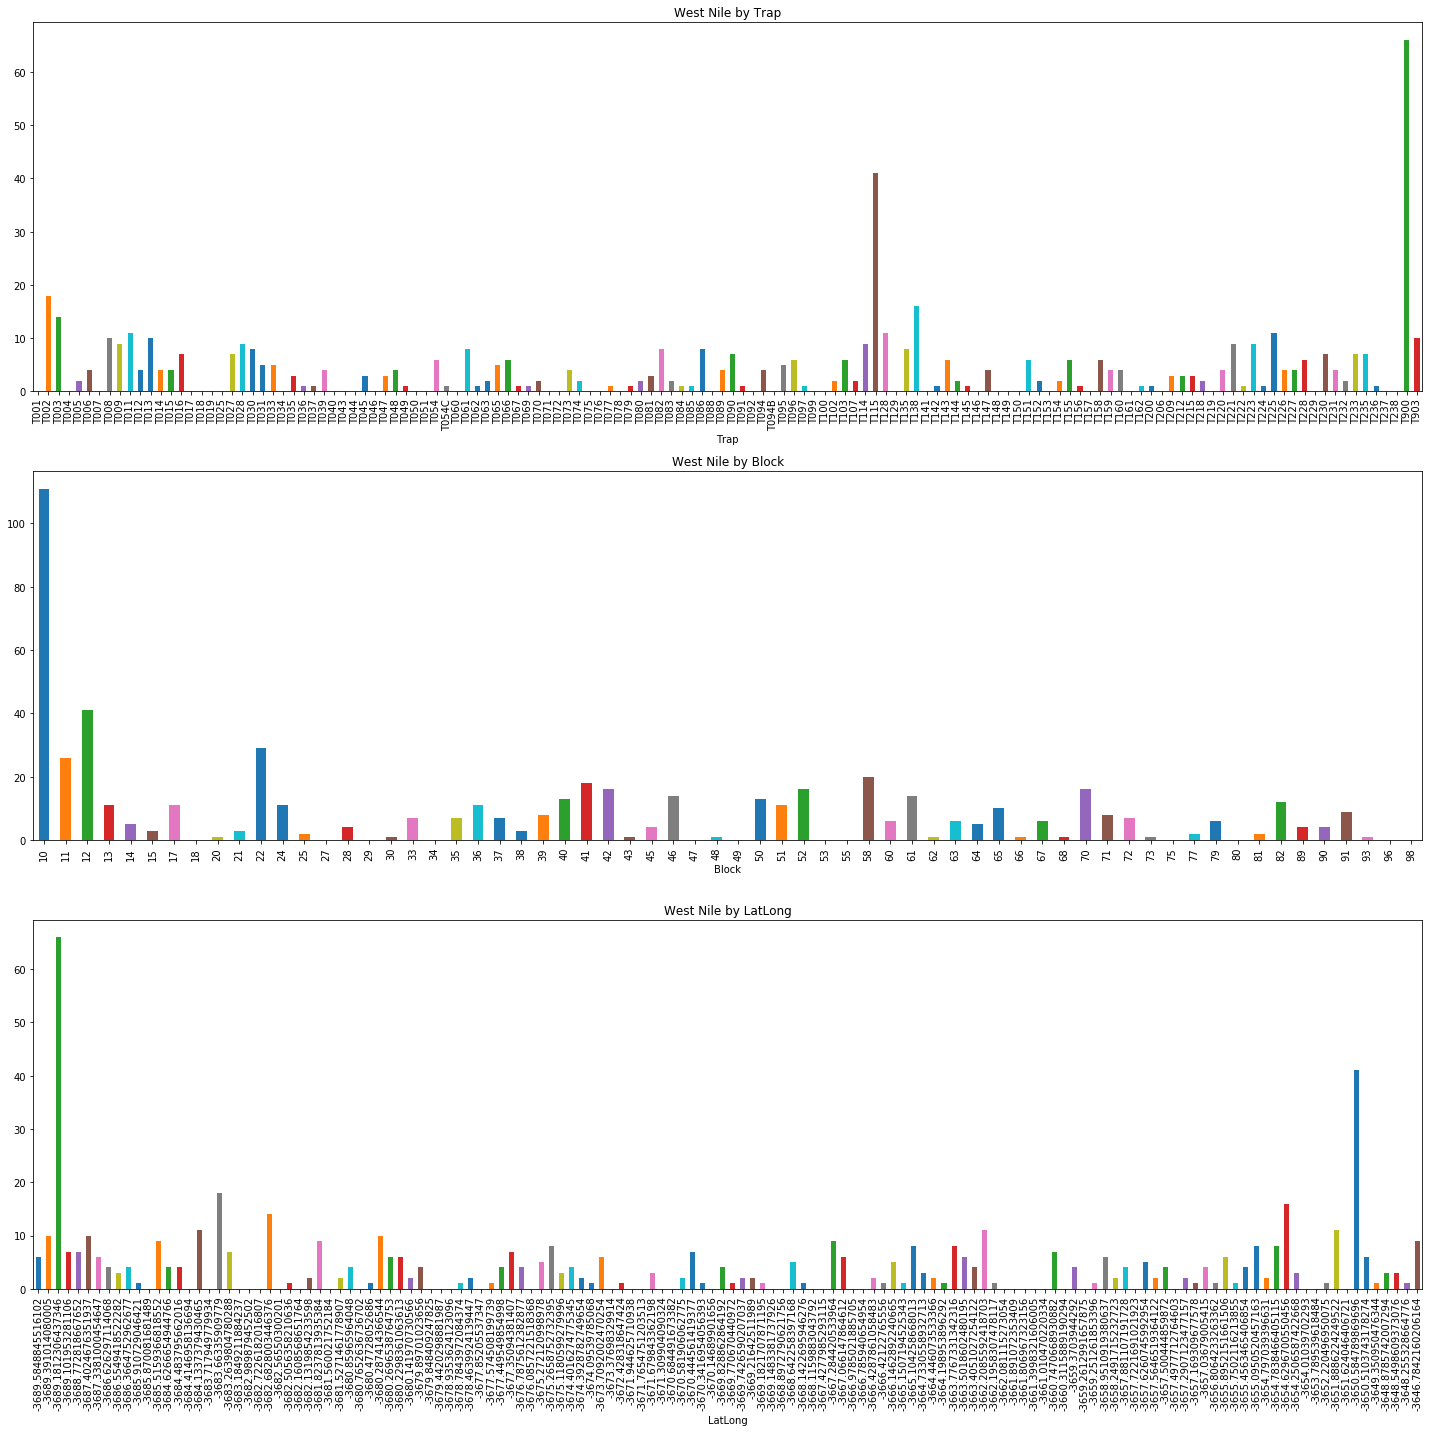

In [20]:
f,axes = plt.subplots(3,1,figsize=(20,20))
for var,ax in zip(['Trap','Block','LatLong'],axes.flatten()):
    df_train.groupby(var)['WnvPresent'].sum().plot(kind='bar',ax=ax);
    ax.set_title('West Nile by '+var)
    plt.tight_layout()

This will be useful later. However, later on, we'll look at these on an actual map. This helps us see how many cases we have, and how many areas there are to look at and consider. T115 and T900 have a high virus rate. Blocks are larger units, and there's a higher virus rate in the earlier blocks, specifically block 10. 

## Basic Visuals
### Mosquitoes

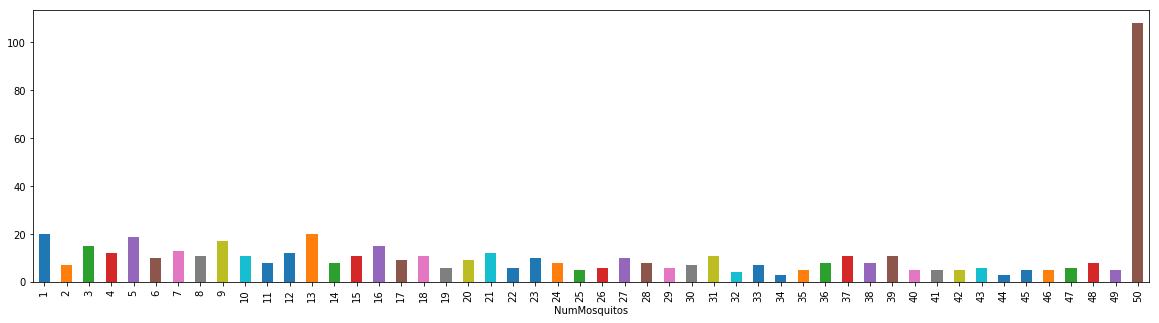

In [21]:
df_train.groupby('NumMosquitos')['WnvPresent'].sum().plot(kind='bar',figsize=(20,5));

The spike at 50 makes sense because we know that 50 is the max count.

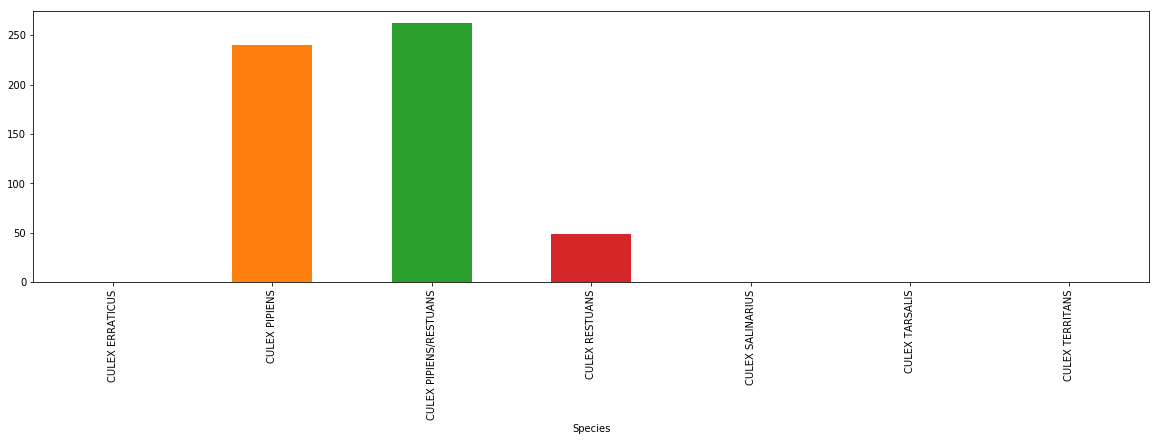

In [22]:
df_train.groupby('Species')['WnvPresent'].sum().plot(kind='bar',figsize=(20,5));

This is very interesting to know. Only 3 species carry WNV.

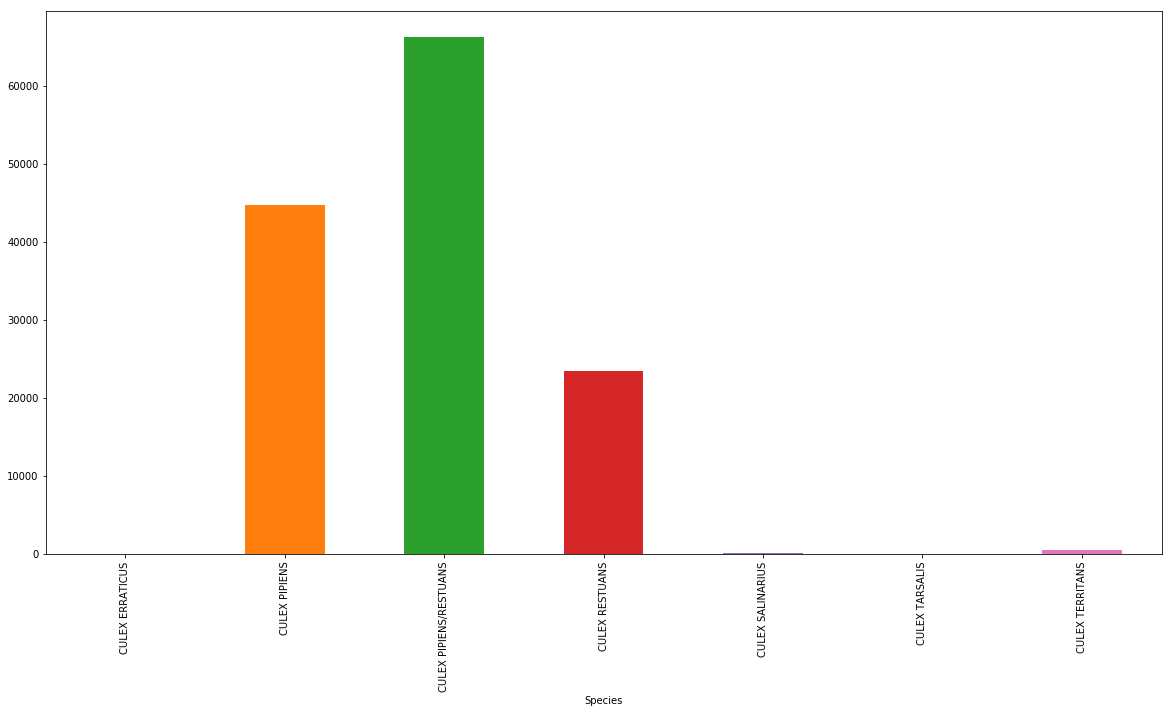

In [23]:
df_train.groupby('Species')['NumMosquitos'].sum().plot(kind='bar',figsize=(20,10));

Those same 3 also have the highest count. The other 4 are almost non-existent.

## Basic Visuals
### Dates

In [24]:
# all the unique year-months for trap data
trap_months = ['2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2011-06','2011-07','2011-08','2011-09','2013-06','2013-07','2013-08','2013-09']
trap_years = ['2007','2009','2011','2013']

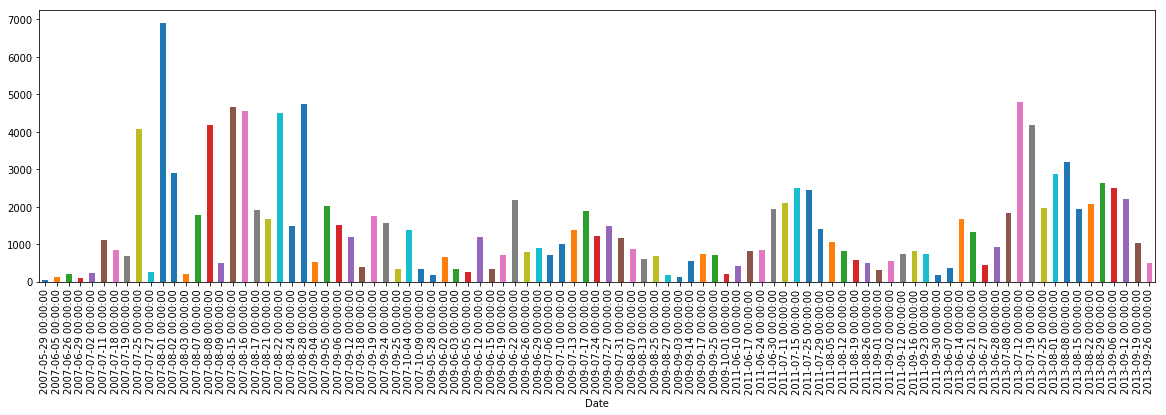

In [25]:
df_train.groupby('Date')['NumMosquitos'].sum().plot(kind='bar',figsize=(20,5));

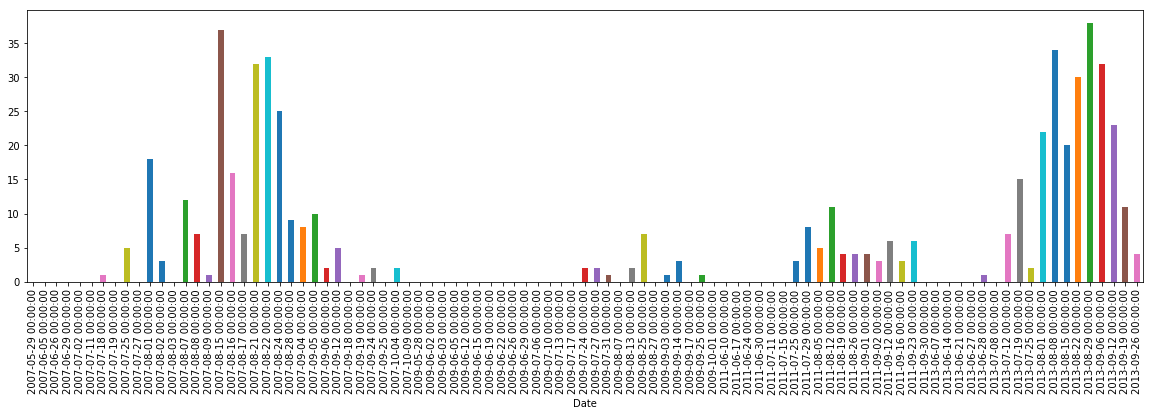

In [26]:
df_train.groupby('Date')['WnvPresent'].sum().plot(kind='bar',figsize=(20,5));

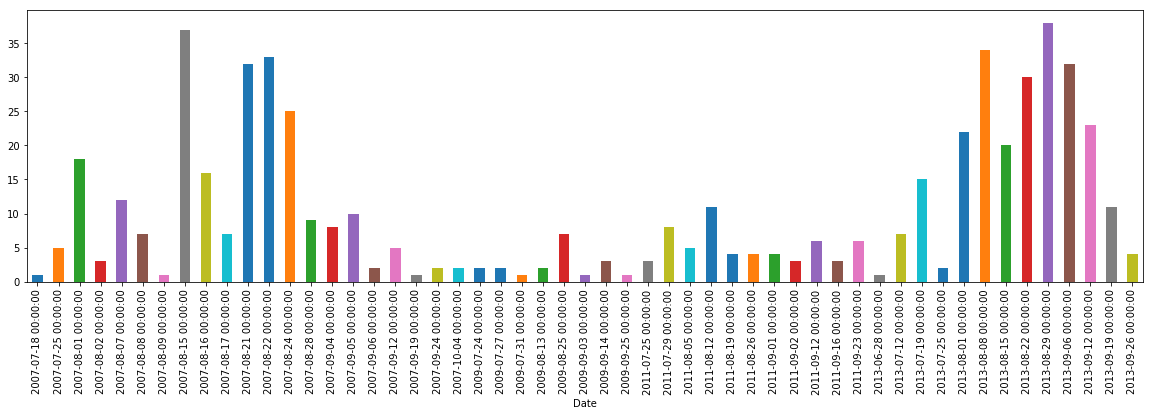

In [27]:
df_train[df_train['WnvPresent'] == 1].groupby('Date')['WnvPresent'].sum().plot(kind='bar',figsize=(20,5));

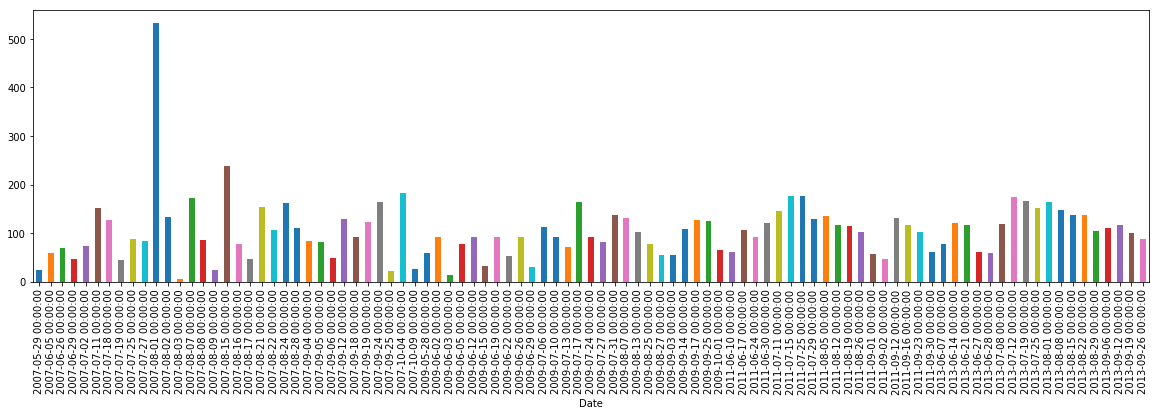

In [28]:
df_train[df_train['WnvPresent'] == 0].groupby('Date')['WnvPresent'].count().plot(kind='bar',figsize=(20,5));

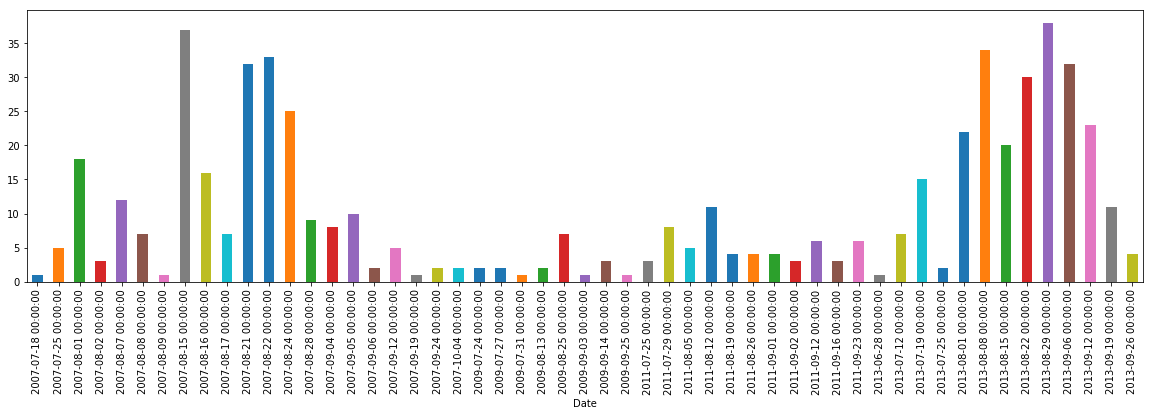

In [29]:
df_train[df_train['WnvPresent'] == 1].groupby('Date')['WnvPresent'].sum().plot(kind='bar',figsize=(20,5));

Wow, this is crazy interesting. We see that there are no cases of viruses during the 6th month, and only 1 occurrence in the 10th. This leads us to a critical point when dealing with our weather data. What changes in the weather from June to July? And September and October?

As for the number of mosquitoes by date, we see that same trend. There are very few in June and October, but a huge spike in July-September.

#### July, August, and September are the main months we'll want to keep a close eye on.

## Maps

In [30]:
trap_df = df_train[['Trap','Longitude', 'Latitude', 'WnvPresent']]

In [31]:
wnv_df = df_train[['Longitude', 'Latitude', 'WnvPresent']]

In [32]:
num_mos_df = df_train[['Longitude', 'Latitude', 'NumMosquitos']]

We know that the spray data goes beyond the bounds of the area of concern which is dictated by these boundires: `(-88, -87.5, 41.6, 42.1)`.

Also, there are very few instances of trap data compared to spray. Thus, we'll look at each date given in `df_train` and will general the spray data for that given year.

In [33]:
spray_df = df_spray[(df_spray['Longitude'] >= -88.0) & (df_spray['Longitude'] <= -87.5) & (df_spray['Latitude'] >= 41.6) & (df_spray['Latitude'] <= 42.1)]

Let's look at how are data changes year by year.

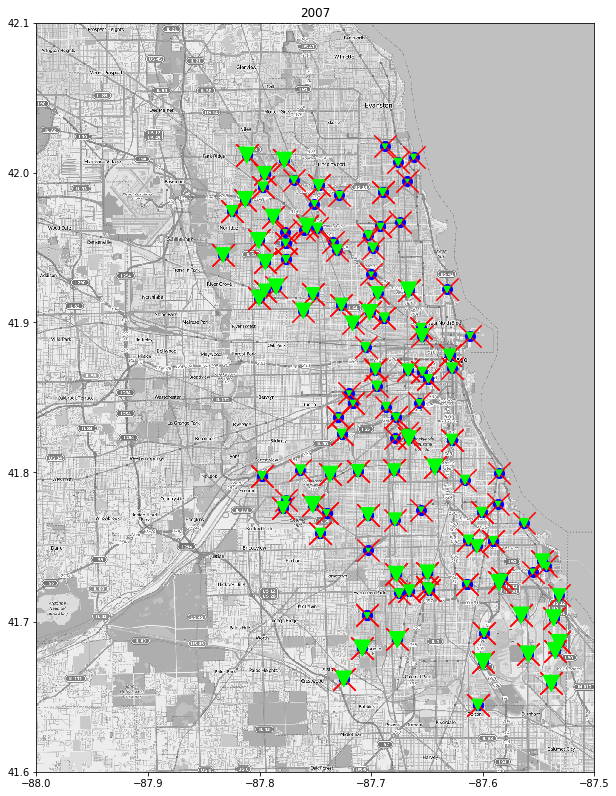

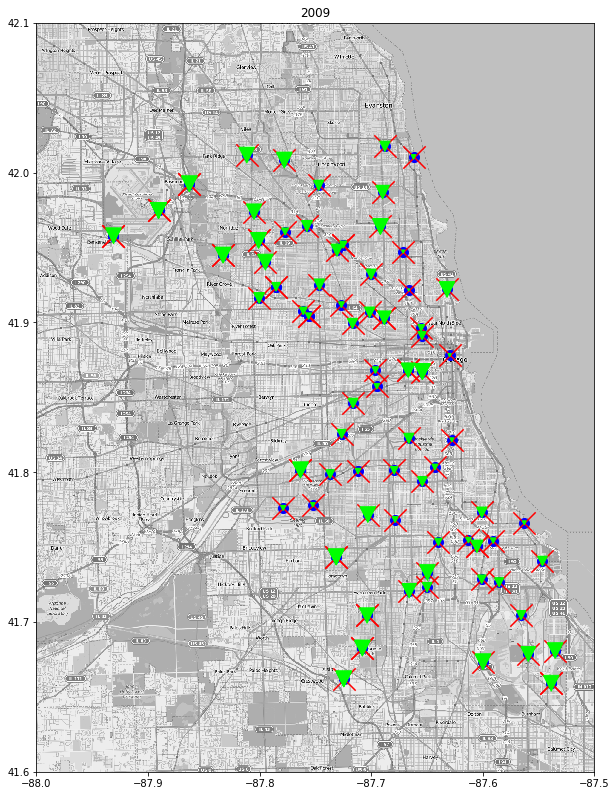

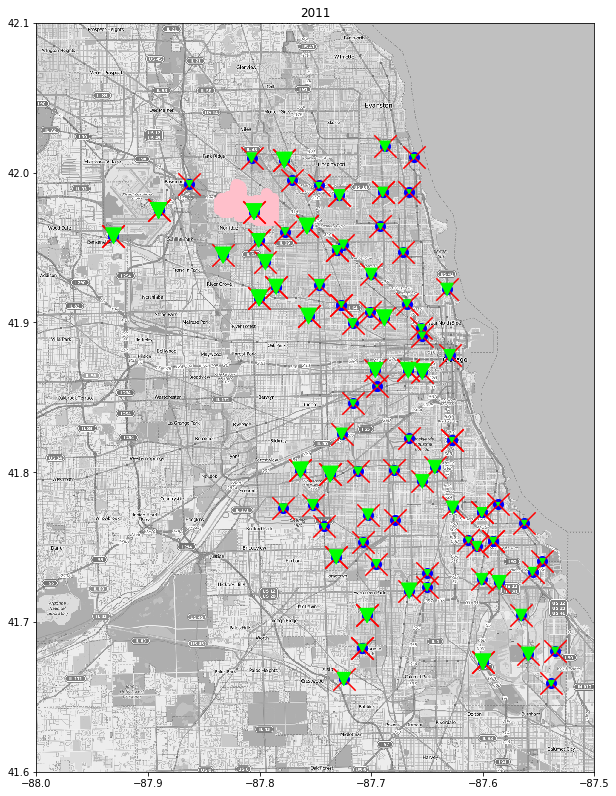

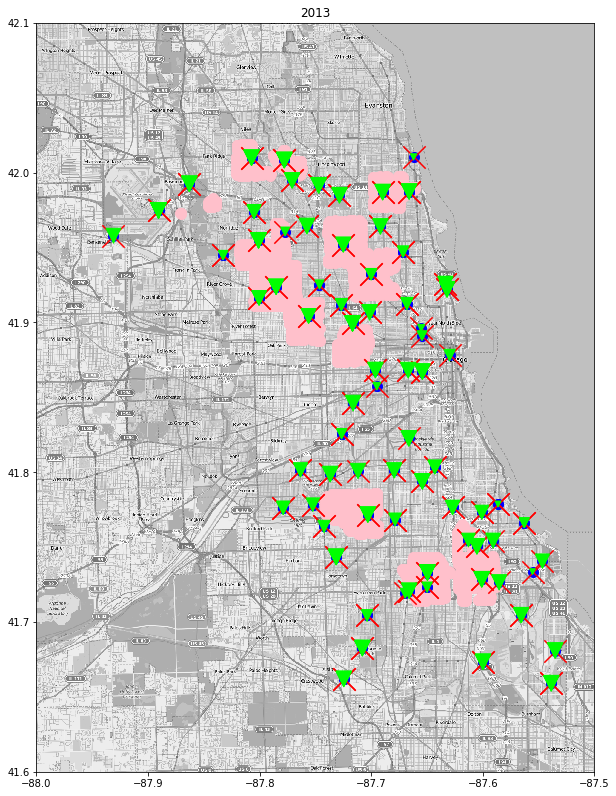

In [34]:
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

for year in trap_years:
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    
    traps = trap_df[year].drop_duplicates().values
    wnv = wnv_df[year].drop_duplicates().values
    num_mos = num_mos_df[year].drop_duplicates().values
    spray = spray_df[year].drop_duplicates().values
    
    plt.scatter(spray[:,1], spray[:,0], color='pink', s=100)
    plt.scatter(traps[:,1], traps[:,2], marker='o',color='blue', s=100)
    plt.scatter(wnv[:,0], wnv[:,1], marker='x', color='red', s=500)
    plt.scatter(num_mos[:,0], num_mos[:,1], marker='v', color='lime', s=num_mos[:,2]*5)
    plt.title(year)

There's a drop in the number of mosquitoes from 2007 to 2009, but they spread around the map more. Then there's a big jump back from 2011 to 2013. Because of that jump, we'll look at the data by month on 2011 and 2013.

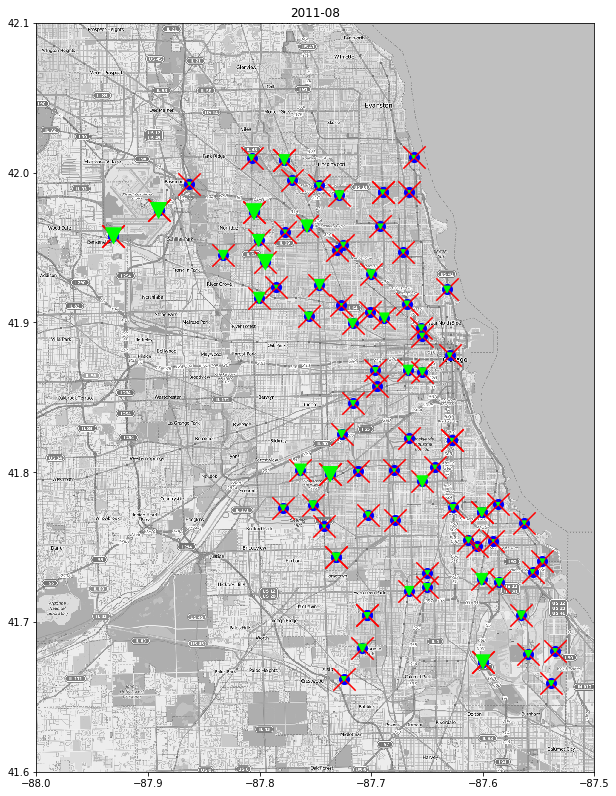

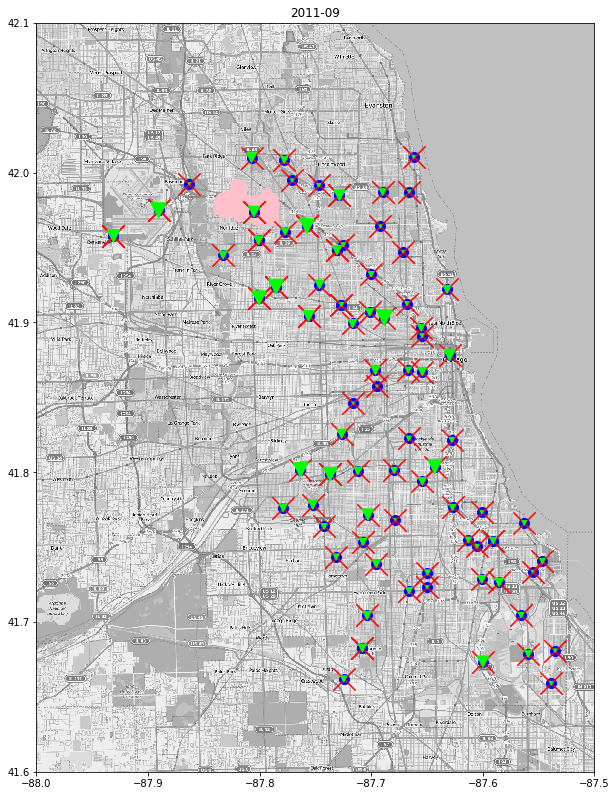

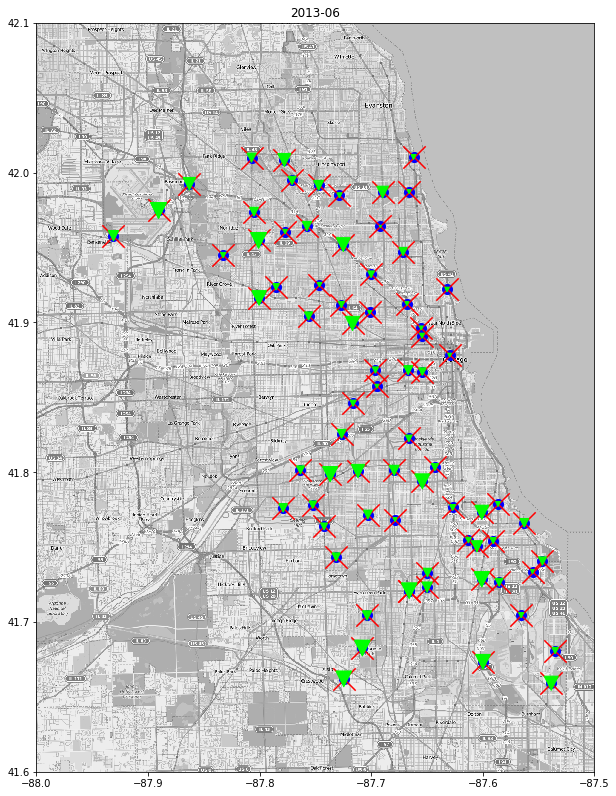

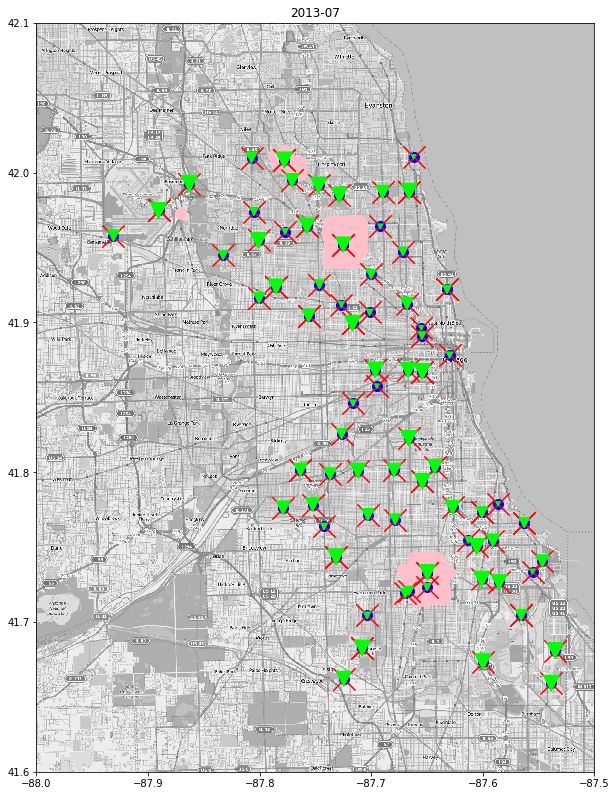

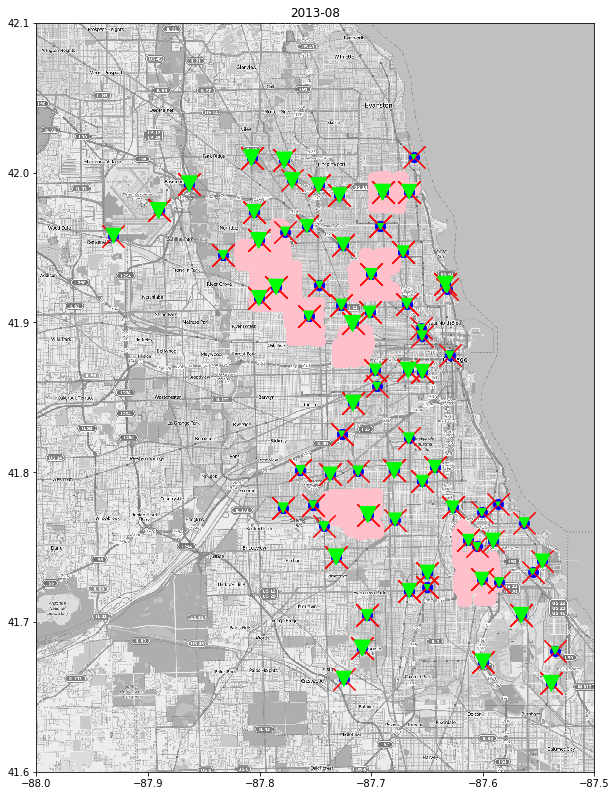

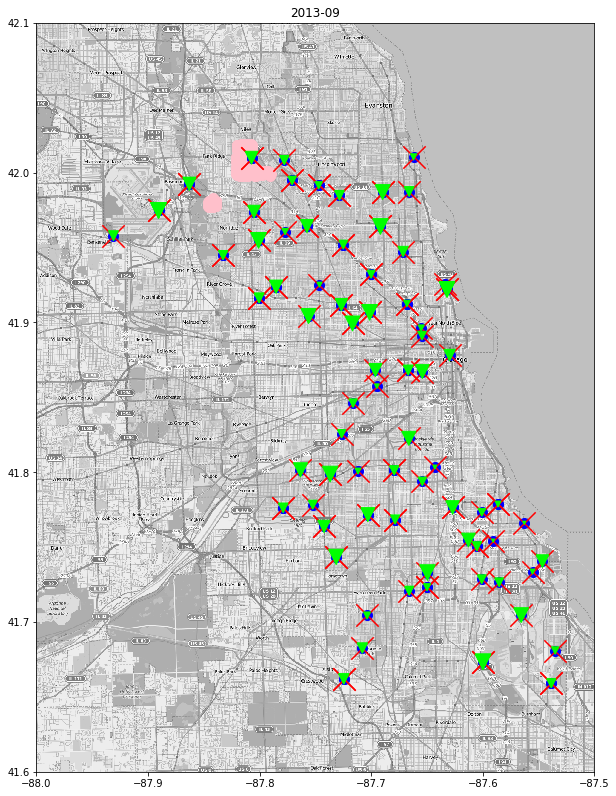

In [35]:
for year in trap_months[-6:]:
    plt.figure(figsize=(10,14))
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    
    traps = trap_df[year].drop_duplicates().values
    wnv = wnv_df[year].drop_duplicates().values
    num_mos = num_mos_df[year].drop_duplicates().values
    spray = spray_df[year].drop_duplicates().values
    
    plt.scatter(spray[:,1], spray[:,0], color='pink', s=100)
    plt.scatter(traps[:,1], traps[:,2], marker='o',color='blue', s=100)
    plt.scatter(wnv[:,0], wnv[:,1], marker='x', color='red', s=500)
    plt.scatter(num_mos[:,0], num_mos[:,1], marker='v', color='lime', s=num_mos[:,2]*5)
    plt.title(year)

There was no spraying prior to 2011-09. There was a large amount of spray placed in 2013-08, and there was no effect in the number of mosquitoes in 2013-09. This leads us to believe that the spray data will have almost no effect in our model.

This has given us a lot of helpful information. To summarize the most important things we've learned:
1. Only 3 species should be given full consideration.
2. July-September seem to have the highest rate of the virus.
3. Spraying has little to no effect on the number of mosquitoes.

Lastly, just an interesting dataframe for us to consider when moving forward:

In [36]:
df_train.groupby(['Date','Trap'])[['NumMosquitos','WnvPresent']].sum().sort_values('NumMosquitos')

NumMosquitos  WnvPresent
Date       Trap                          
2007-09-19 T083             1           0
2007-08-07 T034             1           0
2009-06-05 T095             1           0
2011-08-19 T224             1           0
2009-06-05 T090             1           0
           T089             1           0
2013-08-08 T018             1           0
2009-06-05 T062             1           0
2007-08-07 T054             1           0
           T060             1           0
2009-06-05 T049             1           0
2011-08-19 T233             1           0
2009-06-05 T046             1           0
           T039             1           0
2013-08-01 T220             1           0
2009-06-05 T003             1           0
2009-06-02 T221             1           0
2011-08-26 T013             1           0
2013-08-01 T138             1           0
2011-08-26 T017             1           0
2009-06-05 T144             1           0
           T152             1           0
2007-08-07 T030             1           0
2011-08-19 T200             1           0
2009-06-19 T018             1           0
2011-08-12 T224             1           0
           T225             1           0
2011-08-19 T002             1           0
           T012             1           0
2009-06-15 T148             1           0
...                       ...         ...
2009-06-22 T903           520           0
2009-07-27 T900           526           0
2013-09-06 T900           550           9
2007-08-28 T138           574           1
2013-07-12 T002           582           0
2011-07-25 T900           601           2
2013-08-29 T900           608          12
2007-09-24 T115           627           2
2007-08-17 T138           772           1
2011-06-30 T900           801           0
2007-08-28 T103           822           1
2009-06-29 T900           878           0
2007-08-01 T138           909           1
2007-07-25 T138           913           0
2007-08-16 T128           919           3
2007-09-06 T115           938           0
2013-08-01 T900           984           9
2007-08-16 T138          1000           2
2007-08-02 T138          1075           1
2007-08-22 T138          1124           7
2007-09-19 T115          1361           1
2009-06-22 T900          1596           0
2007-08-22 T115          1615           7
2007-08-08 T115          1625           3
2007-09-05 T115          1648           3
2007-08-08 T138          1892           2
2007-08-28 T115          2476           4
2007-08-01 T115          2479           0
2007-08-16 T115          2636          11
2007-07-25 T115          3002           5

[4616 rows x 2 columns]